In [31]:
%%capture
!pip install scikit-plot

In [32]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Importing Libraries and Data

In [33]:
import pandas as pd
import numpy as np
import scikitplot
import random
import seaborn as sns
import keras
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils.vis_utils import plot_model
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D,Activation,Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.simplefilter("ignore")
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.regularizers import l1, l2
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

In [34]:
data = pd.read_csv("../input/fer2013/fer2013.csv")


In [35]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [36]:
len(data['pixels'][2])

8581

In [37]:
data['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [38]:
data['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [39]:
len(data['pixels'])

35887

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


# checking for any null values

In [41]:
data.isnull().values.any()

False

# Data Preprocessing

In [42]:
df = pd.DataFrame(data['emotion'].value_counts())

In [43]:
df

,emotion
3,8989
6,6198
4,6077
2,5121
0,4953
5,4002
1,547


<AxesSubplot:ylabel='emotion'>

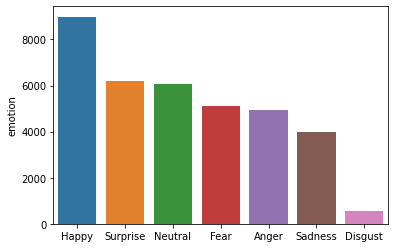

In [44]:
Labels = ['Happy',"Surprise", 'Neutral', 'Fear','Anger', 'Sadness','Disgust' ]
sns.barplot(data=df, y="emotion", x = Labels)

In [45]:
pixel_data = np.uint8(data['pixels'].str.split(" ").tolist ())

In [46]:
emotion_data = np.array(data['emotion'].tolist()).reshape(-1,1)
encoder = OneHotEncoder()
data_tr = encoder.fit_transform(emotion_data).toarray()

In [47]:
pixel_data.shape, data_tr.shape
#there is an other version of encoding where new columns are created and values are marked 1 or 0 acording to the required categorical variable that we are encoding.

((35887, 2304), (35887, 7))

In [48]:
#new_data = pd.concat([pd.DataFrame(emotion_data.reshape(-1,1)), pd.Series(d), data['Usage']], axis = 1, keys = ['emotion', 'pixels', 'Usage'])

In [49]:
pixel_data = pixel_data.reshape((35887, 48, 48,1))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(pixel_data, data_tr, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

In [51]:
X_train.shape, X_val.shape, X_test.shape

((29068, 48, 48, 1), (3230, 48, 48, 1), (3589, 48, 48, 1))

In [52]:
data_tr

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

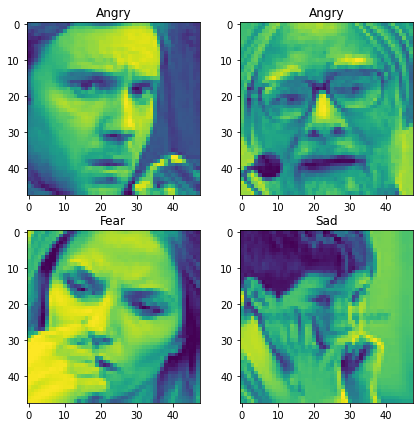

In [53]:
labels= ['Angry','Disgust','Fear','Happiness','Sad','Surprise','Neutral']
plt.figure(figsize=(7,7))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(X_train[i])
    plt.title(labels[y_train[i].tolist().index(1)])
plt.show()

# Building a model
basics of CNN -  https://insightsimaging.springeropen.com/articles/10.1007/s13244-018-0639-9



In [54]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten()) 
model.add(Dense(7, activation='softmax'))
model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                

In [56]:
model.fit(X_train, y_train,
         epochs=30,
        batch_size=64,   
        verbose=1,)

Epoch 1/30
455/455 [==============================] - 4s 8ms/step - loss: 2.0920 - accuracy: 0.3077
Epoch 2/30
455/455 [==============================] - 4s 8ms/step - loss: 1.7433 - accuracy: 0.3861
Epoch 3/30
455/455 [==============================] - 4s 8ms/step - loss: 1.5887 - accuracy: 0.4330
Epoch 4/30
455/455 [==============================] - 3s 8ms/step - loss: 1.4745 - accuracy: 0.4708
Epoch 5/30
455/455 [==============================] - 3s 8ms/step - loss: 1.3790 - accuracy: 0.5093
Epoch 6/30
455/455 [==============================] - 4s 8ms/step - loss: 1.2876 - accuracy: 0.5366
Epoch 7/30
455/455 [==============================] - 3s 8ms/step - loss: 1.2170 - accuracy: 0.5600
Epoch 8/30
455/455 [==============================] - 3s 8ms/step - loss: 1.1382 - accuracy: 0.5864
Epoch 9/30
455/455 [==============================] - 4s 8ms/step - loss: 1.0748 - accuracy: 0.6067
Epoch 10/30
455/455 [==============================] - 3s 8ms/step - loss: 1.0097 - accuracy: 0.6317

In [57]:
loss = model.evaluate(X_test,y_test) 
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 0s 3ms/step - loss: 2.5676 - accuracy: 0.4734
Test Acc: 0.4733909070491791


Accuracy is very low, so adding extra layers to improve the model


In [58]:
model1= tf.keras.models.Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model1.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
      
model1.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten()) 
model1.add(Dense(7, activation='softmax'))
model1.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 128)      

In [60]:
model1.fit(X_train, y_train,
         epochs=30,
        batch_size=64,   
        verbose=1,)

Epoch 1/30
455/455 [==============================] - 7s 14ms/step - loss: 4.4082 - accuracy: 0.2831
Epoch 2/30
455/455 [==============================] - 6s 14ms/step - loss: 3.7813 - accuracy: 0.3650
Epoch 3/30
455/455 [==============================] - 6s 14ms/step - loss: 3.4065 - accuracy: 0.4068
Epoch 4/30
455/455 [==============================] - 6s 14ms/step - loss: 3.0866 - accuracy: 0.4369
Epoch 5/30
455/455 [==============================] - 6s 14ms/step - loss: 2.8166 - accuracy: 0.4593
Epoch 6/30
455/455 [==============================] - 6s 14ms/step - loss: 2.5780 - accuracy: 0.4799
Epoch 7/30
455/455 [==============================] - 6s 14ms/step - loss: 2.3514 - accuracy: 0.5002
Epoch 8/30
455/455 [==============================] - 6s 14ms/step - loss: 2.1642 - accuracy: 0.5215
Epoch 9/30
455/455 [==============================] - 6s 14ms/step - loss: 2.0139 - accuracy: 0.5338
Epoch 10/30
455/455 [==============================] - 6s 14ms/step - loss: 1.8710 - accura

In [61]:
loss = model1.evaluate(X_test,y_test) 
print("Test Acc: " + str(loss[1]))


113/113 [==============================] - 1s 4ms/step - loss: 1.7603 - accuracy: 0.5932
Test Acc: 0.5932014584541321


There is a slight improvement in accuracy, so lets add more layers to make the model complex and use callbacks to prevent overfitting.

In [62]:
model2= tf.keras.models.Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model2.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
      
model2.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
    
model2.add(Flatten()) 
model2.add(Dense(7, activation='softmax'))
model2.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, 
                              restore_best_weights=True,mode="max",patience = 5),
                ModelCheckpoint('best_model.h5',monitor="val_accuracy",verbose=1,
                                save_best_only=True,mode="max")]

In [64]:
history = model2.fit(X_train, y_train,
         epochs=30,
        batch_size=64,   
        verbose=1,
          callbacks=[checkpointer],
                    validation_data= (X_val, y_val))

Epoch 1/30
455/455 [==============================] - 11s 22ms/step - loss: 13.7018 - accuracy: 0.2615 - val_loss: 12.2513 - val_accuracy: 0.3096

Epoch 00001: val_accuracy improved from -inf to 0.30960, saving model to best_model.h5
Epoch 2/30
455/455 [==============================] - 9s 21ms/step - loss: 11.0909 - accuracy: 0.3559 - val_loss: 9.7852 - val_accuracy: 0.3929

Epoch 00002: val_accuracy improved from 0.30960 to 0.39288, saving model to best_model.h5
Epoch 3/30
455/455 [==============================] - 10s 21ms/step - loss: 8.6891 - accuracy: 0.4168 - val_loss: 7.5966 - val_accuracy: 0.4412

Epoch 00003: val_accuracy improved from 0.39288 to 0.44118, saving model to best_model.h5
Epoch 4/30
455/455 [==============================] - 9s 21ms/step - loss: 6.6740 - accuracy: 0.4646 - val_loss: 5.7844 - val_accuracy: 0.5037

Epoch 00004: val_accuracy improved from 0.44118 to 0.50372, saving model to best_model.h5
Epoch 5/30
455/455 [==============================] - 9s 21ms/

In [65]:
loss = model2.evaluate(X_test,y_test) 
print("Test Acc: " + str(loss[1]))


113/113 [==============================] - 1s 6ms/step - loss: 1.9516 - accuracy: 0.6314
Test Acc: 0.6313736438751221


Accuracy is 61% which is ok but can improve. lets visualize the results.

In [66]:
pred_val = model2.predict(X_val)
y_val_pred = np.argmax(pred_val, axis = 1)
y_val_pred

array([2, 6, 5, ..., 4, 0, 6])

In [67]:
from sklearn.metrics import accuracy_score
val_accuracy = accuracy_score(np.argmax(y_val, axis = 1), y_val_pred)

In [68]:
val_accuracy

0.6232198142414861

It performed same on the validation set, so its not overfitting.

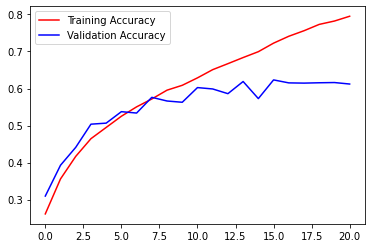

In [69]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

we can see that validation accuracy has not increased much, this indicates that the model is overfitting a little bit

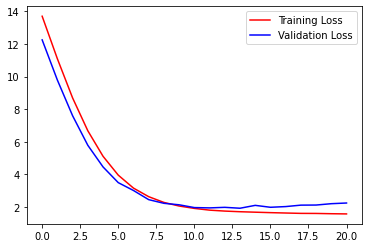

In [70]:
plt.plot(history.history['loss'], 'r', label = 'Training Loss')
plt.plot(history.history['val_loss'], 'b', label = 'Validation Loss')
plt.legend()

Drawing a Confusion Matrix to check the performance of the algorithm

In [71]:
pred_test = model2.predict(X_test)
y_pred = np.argmax(pred_test, axis = 1)

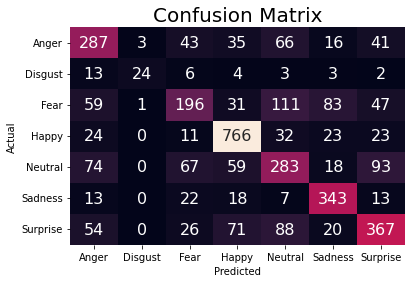

In [72]:
CLASS_LABELS = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]
cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.title('Confusion Matrix', fontsize = 20)
ax = sns.heatmap(cm, cbar=False, annot=True, annot_kws={"size": 16}, fmt='g')

In [73]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.548     0.585     0.566       491
           1      0.857     0.436     0.578        55
           2      0.528     0.371     0.436       528
           3      0.778     0.871     0.822       879
           4      0.480     0.476     0.478       594
           5      0.678     0.825     0.744       416
           6      0.626     0.586     0.606       626

    accuracy                          0.631      3589
   macro avg      0.642     0.593     0.604      3589
weighted avg      0.624     0.631     0.623      3589



Is is incorrectly recognising many fear faces as neutral and many neutral as surprise.
two ways to fix this is to get more data or to increase increase more epochs



# Data Augmentation

In [74]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [75]:
from tqdm import tqdm
m,n,o,p = X_train.shape

for j in tqdm(range(m)):
    first_image = X_train[j]
    for i in range(3):
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        X_train = np.concatenate((X_train, augmented_image))
        y_train = np.concatenate((y_train, tf.expand_dims(y_train[j],0)))

100%|██████████| 29068/29068 [1:45:11<00:00,  4.61it/s]


In [76]:
X_train.shape, y_train.shape

((116272, 48, 48, 1), (116272, 7))

Now train the model2 with this augmented data

In [77]:
model3= tf.keras.models.Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model3.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
      
model3.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
    
model3.add(Flatten()) 
model3.add(Dense(7, activation='softmax'))
model3.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [78]:
history = model3.fit(X_train, y_train,
         epochs=30,
        batch_size=64,   
        verbose=1,
          callbacks=[checkpointer],
                    validation_data= (X_val, y_val))

Epoch 1/30
1817/1817 [==============================] - 38s 21ms/step - loss: 10.0067 - accuracy: 0.2834 - val_loss: 5.5096 - val_accuracy: 0.4149

Epoch 00001: val_accuracy did not improve from 0.62322
Epoch 2/30
1817/1817 [==============================] - 37s 20ms/step - loss: 3.5703 - accuracy: 0.4255 - val_loss: 2.2994 - val_accuracy: 0.4969

Epoch 00002: val_accuracy did not improve from 0.62322
Epoch 3/30
1817/1817 [==============================] - 37s 20ms/step - loss: 1.9938 - accuracy: 0.5066 - val_loss: 1.6891 - val_accuracy: 0.5653

Epoch 00003: val_accuracy did not improve from 0.62322
Epoch 4/30
1817/1817 [==============================] - 37s 20ms/step - loss: 1.6910 - accuracy: 0.5423 - val_loss: 1.5754 - val_accuracy: 0.5718

Epoch 00004: val_accuracy did not improve from 0.62322
Epoch 5/30
1817/1817 [==============================] - 37s 20ms/step - loss: 1.5963 - accuracy: 0.5605 - val_loss: 1.5311 - val_accuracy: 0.5842

Epoch 00005: val_accuracy did not improve fr

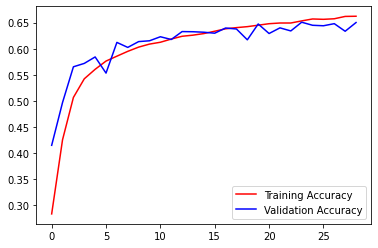

In [79]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

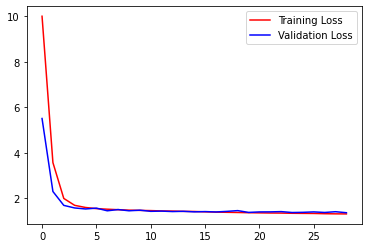

In [80]:
plt.plot(history.history['loss'], 'r', label = 'Training Loss')
plt.plot(history.history['val_loss'], 'b', label = 'Validation Loss')
plt.legend()

as we can see becuase of augmented data, we were able to make the training and validation accuracy almost similar.

In [81]:
pred_test = model3.predict(X_test)
y_pred = np.argmax(pred_test, axis = 1)

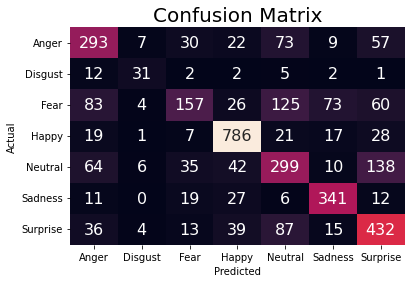

In [82]:
CLASS_LABELS = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]
cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.title('Confusion Matrix', fontsize = 20)
ax = sns.heatmap(cm, cbar=False, annot=True, annot_kws={"size": 16}, fmt='g')

In [83]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.566     0.597     0.581       491
           1      0.585     0.564     0.574        55
           2      0.597     0.297     0.397       528
           3      0.833     0.894     0.862       879
           4      0.485     0.503     0.494       594
           5      0.730     0.820     0.772       416
           6      0.593     0.690     0.638       626

    accuracy                          0.652      3589
   macro avg      0.627     0.624     0.617      3589
weighted avg      0.647     0.652     0.640      3589



There is still scope for imporvement here but we can see that f1 score has increased from the preious version of the model. we can increase the epochs also to check if the model performs any better than this.

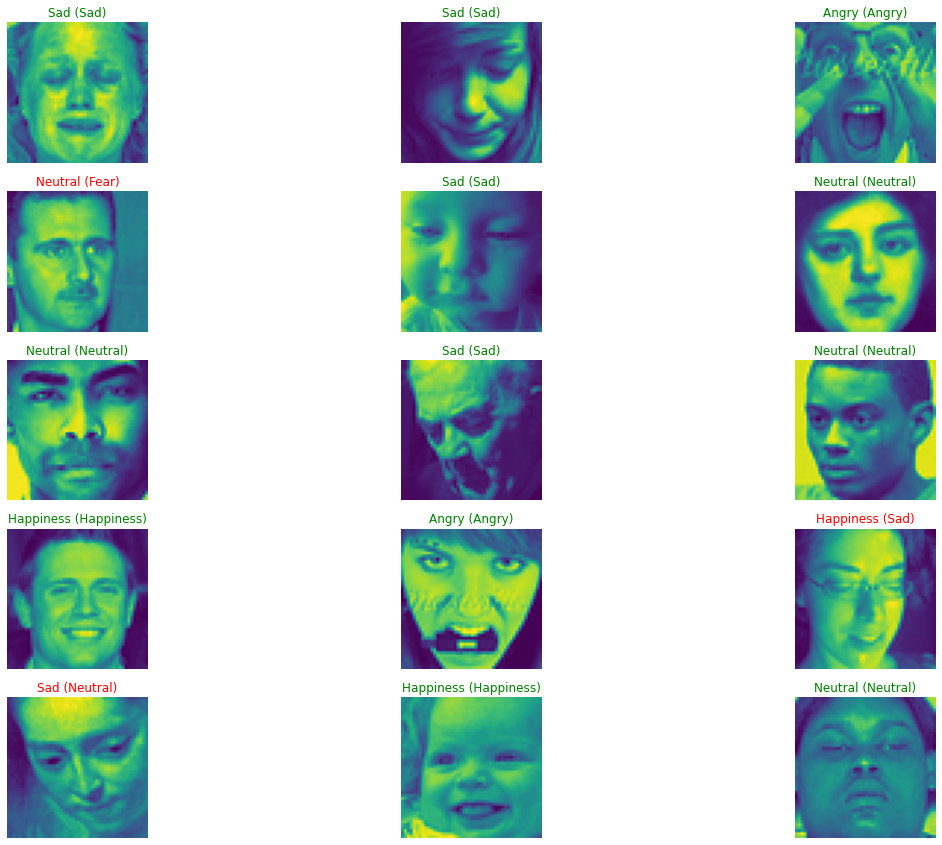

In [84]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}

figure = plt.figure(figsize=(20, 15))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(5, 3, i + 1)
    ax.imshow(X_test[index])
    ax.axis('off')
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(y_test,axis=1)[index]]
    
    ax.set_title("{} ({})".format((predict_index), 
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))